In [80]:
%matplotlib inline

## Notes (important !!! )

### `Linear Dimension Reduction Method: PCA(Principal Components Analysis)、LDA(Linear Discriminant Analysis)`

- reduce dim based on __Euclidean distance__ between coordinates

### `Manifold Learning (Nonlinear Dimension Reduction Method): Isomap(Isometric Mapping)、LLE(Locally Linear Embedding)、LE(Laplacian Eigenmaps)` 

[brief intro to manifold learning (in chinese)](http://blog.pluskid.org/?p=533)

- reduce dim based on __Distance Matrix__ between points in space (used in `MDS` in Isomap)

## How does Isomap works?

### first a quick intro 

- Basic idea of manifold learning: `Extract low dim feature of high dim structure`

> Eg: 


![](../images/man1.png)

> What should be the actual distance between A and B?

- is actually the blue solid curve from A to B (term: geodesic (测地线))
- `Not the dotted line`, which indicates that the Euclidean distance is not applicable here

> What would the results like?

A glimpse of visualization: 

![](../images/man2.png)


- Here:
    - grey lines group: KNN graph
    - __(Attention!!)__ apparently the red line (shortest path in KNN graph) is slightly longer than the blue line (the geodesic)
        - However, since the actual geodesic is almost impossible to achieve, thus finding the shorted path in KNN graph is considered a decent substitute

## Start from MDS（Multidimensional Scaling）

- Input distance matrix:

![](../images/man4.png)


> What kind of info would be lost if the only input given is a Distance Matrix?

- Impossible to reconstruct origin graph based on a single distance matrix

    - if points are shifted, rotated, etc, distance would still remain the same;


> Solutions?

Suppose X is a nxq Matrix

- n: sample size
- q: dimension

\begin{align}
	B &= XX^T  \space\space\space\space(n\times n) \\
	  &= (XM)(XM)^T	\space\space\space\space(M: \:Orthonormal \:\: basis)\\
	  &= XMM^TX	\\
	  &= XX^T
\end{align}

- Notes:

    - if X is orthogonal transformed (shifted, rotated..), `B would not be affected`
    

> ### Strategy:

- First deduce B from Distance Matrix D
- Then decompose B to get X

#### 1. Normalization (shift the centroid of the whole dataset to (0,0), since B would not be affected by any orthogonal transformation of X)

\begin{align}
	\sum_{i=1}^nx_{ik} = 0, for \space all \space k =1..q
\end{align}


__The sum of all elements in B__:

\begin{align}
	\sum_{j=1}^nb_{ij} &= \sum_{j=1}^n\sum_{k=1}^{q}x_{ik}x_{jk}\\
				&=\sum_{k=1}^{q}x_{ik}\left(\sum_{j=1}^nx_{jk}\right)\\
				&=0
\end{align}

__Similarly__:

\begin{align}
	\sum_{i=1}^nb_{ij} &= \sum_{i=1}^n\sum_{k=1}^{q}x_{ik}x_{jk}\\
				&=\sum_{k=1}^{q}x_{jk}\left(\sum_{i=1}^nx_{ik}\right)\\
				&=0
\end{align}



\begin{align}
	\sum_{i=1}^nd_{ij}^2 &= \sum_{i=1}^n b_{ii}+b_{jj}-2b_{ij}\\
			&= T + nb_{jj} + 0
\end{align}

__here__: $$T=trace(B)$$

__Similarly:__

\begin{align}
	\sum_{j=1}^nd_{ij}^2 &= \sum_{j=1}^n b_{ii}+b_{jj}-2b_{ij}\\
			&= nb_{ii} + T + 0
\end{align}

__Thus__

\begin{align}
	\sum_{i=1}^n\sum_{j=1}^nd_{ij}^2 &= 2nT
\end{align}

__So base on__

\begin{align}
	d_{ij}^2 &= (x_i-x_j)^2 \\
			  &= \sum_{k=1}^{q}(x_{ik}-x_{jk})^2\\
			  &= \sum_{k=1}^{q}x_{ik}^2+x_{jk}^2-2x_{ik}x_{jk}\\
			  &=b_{ii}+b_{jj}-2b_{ij}
\end{align}

__We have__

\begin{align}
	b_{ij} &= -\frac12(d_{ij}^2-b_{ii}-b_{jj})
\end{align}

__if substitute with__
\begin{align}
	b_{ii} &= \frac{T}n+\frac1n\sum_{j=1}^nd_{ij}^2\\
	b_{jj} &= \frac{T}n+\frac1n\sum_{i=1}^nd_{ij}^2\\
	\frac{2T}{n} &= 	\frac{1}{n^2}\sum_{i=1}^n\sum_{j=1}^nd_{ij}^2
\end{align}

__we have__

\begin{align}
	b_{ij} &= -\frac12(d_{ij}^2-b_{ii}-b_{jj})\\
			&= -\frac12(d_{ij}^2-\frac1n\sum_{j=1}^nd_{ij}^2-\frac1n\sum_{i=1}^nd_{ij}^2+\frac{2T}{n})\\
			&= -\frac12(d_{ij}^2-\frac1n\sum_{j=1}^nd_{ij}^2-\frac1n\sum_{i=1}^nd_{ij}^2+\frac{1}{n^2}\sum_{i=1}^n\sum_{j=1}^nd_{ij}^2)\\
			&= -\frac12(d_{ij}^2-d_{i\cdot}^2-d_{\cdot j}^2+d_{\cdot\cdot}^2)
\end{align}

__Now we are able to calculate B from above__

Since B is symmetric, after decomposition:

\begin{align}
	B &= V\Lambda V^{-1}\\
		&= V\Lambda V^T  
\end{align}



> ### Next, choose the `top q eigenvalues and eigenvectors` to reconstruct matrix X (since D.shape=(n, q), thus there must be at least q nonzero values in matrix B), `or, choose p (p<q) to reduce dimension`

- ### rank(B)=q

### this step is similar to PCA !!

\begin{align}
	B^* = V^*\Lambda ^* V^{*T}	\\
	V^*(n \times p),	\Lambda^* (p \times p)
\end{align}

\begin{align}
	B^* &= V^*{\Lambda ^*}^{\frac12}*{\Lambda ^*}^{\frac12} V^{*T}\\
	  &= X^*{X^*}^T
\end{align}

__So__

$$X^* = V^*{\Lambda ^*}^{\frac12}$$




- Example

![](../images/man5.png)

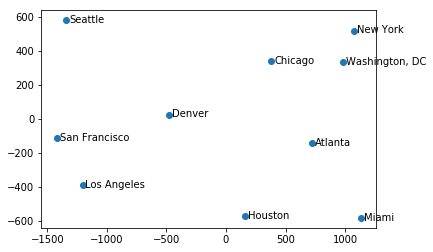

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def mds(D,q):
    D = np.asarray(D)
    DSquare = D**2
    totalMean_ofDsquare = np.mean(DSquare)
    columnMean_ofDsqaure = np.mean(DSquare, axis = 0)
    rowMean_ofDsquare = np.mean(DSquare, axis = 1)
    B = np.zeros(DSquare.shape)
    for i in range(B.shape[0]):
        for j in range(B.shape[1]):
            # -1/2*(d_{ij}^2-d_{i\cdot}^2-d_{\cdot j}^2+d_{\cdot\cdot}^2)
            B[i][j] = -0.5*(DSquare[i][j] - rowMean_ofDsquare[i] - columnMean_ofDsqaure[j]+totalMean_ofDsquare)
    eigVal,eigVec = np.linalg.eig(B)
    # X^* = V^*{\Lambda ^*}^(1/2) , lambda => eigenvalue matrix (only diag values)
    X = np.dot(eigVec[:,:q],np.sqrt(np.diag(eigVal[:q])))

    return X


D = [[0,587,1212,701,1936,604,748,2139,2182,543],
[587,0,920,940,1745,1188,713,1858,1737,597],
[1212,920,0,879,831,1726,1631,949,1021,1494],
[701,940,879,0,1374,968,1420,1645,1891,1220],
[1936,1745,831,1374,0,2339,2451,347,959,2300],
[604,1188,1726,968,2339,0,1092,2594,2734,923],
[748,713,1631,1420,2451,1092,0,2571,2408,205],
[2139,1858,949,1645,347,2594,2571,0,678,2442],
[2182,1737,1021,1891,959,2734,2408,678,0,2329],
[543,597,1494,1220,2300,923,205,2442,2329,0]]

label = ['Atlanta','Chicago','Denver','Houston','Los Angeles','Miami','New York','San Francisco','Seattle','Washington, DC']
X = mds(D,2)
plt.plot(X[:,0],X[:,1],'o')
for i in range(X.shape[0]):
    plt.text(X[i,0]+25,X[i,1]-15,label[i])
plt.show()


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=5)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
X.shape

(901, 64)

### Notes:

> What does __np.r___ do?

- __Row-wise merging__ example:

In [83]:
V = np.array([1,2,3,4,5,6 ])
Y = np.array([7,8,9,10,11,12])
np.r_[V[0:2],Y[0],V[3],Y[1:3],V[4:],Y[4:]]

array([ 1,  2,  7,  4,  8,  9,  5,  6, 11, 12])

In [84]:
np.vstack([V,Y])

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [85]:
np.hstack([V,Y])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [165]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min) # normalization
    plt.figure(figsize=(15, 10))
    
    try:
        ax = plt.subplot(111)
        for i in range(X.shape[0]):
            # mark the digits label next to it
            plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                     color=plt.cm.Set1(y[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})

        if hasattr(offsetbox, 'AnnotationBbox'): # add annotation next to the labels presented
            shown_images = np.array([[1., 1.]])  # annotationbox size: 1x1
            for i in range(X.shape[0]):

                dist = np.sum((X[i] - shown_images) ** 2, 1)
                if np.min(dist) < 4e-3:
                    # don't show points that are too close
                    continue

                # np.r_ : row-wise merging
                shown_images = np.r_[shown_images, [X[i]]]
                imagebox = offsetbox.AnnotationBbox(
                    offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                    X[i])
                ax.add_artist(imagebox)
        plt.xticks([]), plt.yticks([])
        if title is not None:
            plt.title(title)
    except IndexError and TypeError and ValueError:
        ax = plt.subplot(1, 1, 1, projection="3d")
        for i in range(X.shape[0]):
            # mark the digits label next to it
            ax.text(X[i, 0], X[i, 1], X[i, 2], str(digits.target[i]),
                     color=plt.cm.Set1(y[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})
        if title is not None:
            plt.title(title)

Text(0.5,1,'A selection from the 64-dimensional digits dataset')

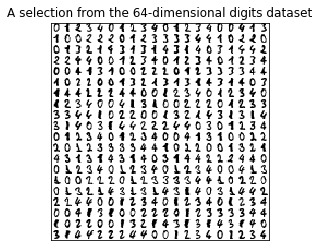

In [140]:
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row)) # image_size = (10, 10), 20 images per row
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8)) # X[i * n_img_per_row + j].shape =(64,)
        # here: padding = (10-8)/2 = 1 for each img
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


### Random 2D projection

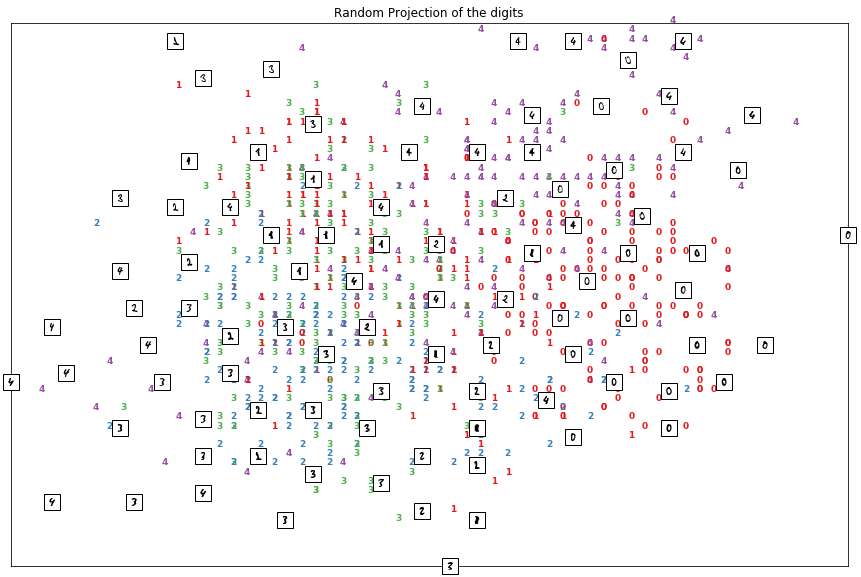

In [127]:
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


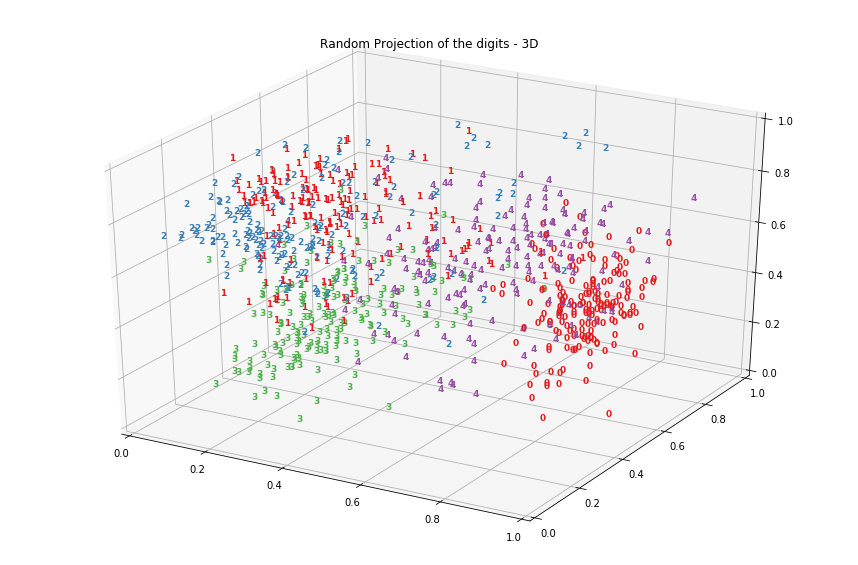

In [171]:
rp = random_projection.SparseRandomProjection(n_components=3, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits - 3D")

### Projection on principal components

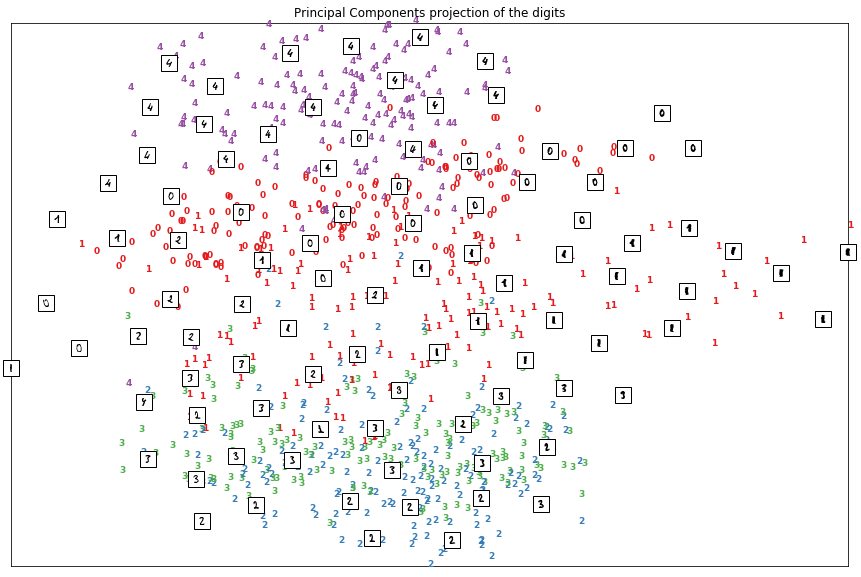

In [159]:
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits")

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


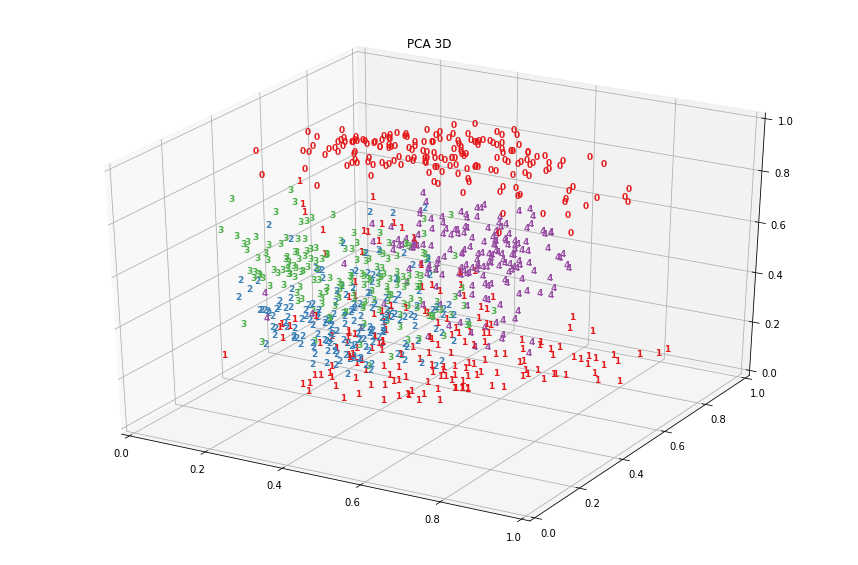

In [166]:
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(X)
plot_embedding(X_pca,"PCA 3D")

In [90]:
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible by adding 0.01 to all number on the diagonal line

In [91]:
M=np.random.randn(3,4)
M

array([[ 0.51557042,  0.55576337, -0.56897647, -1.05630008],
       [ 0.80093062, -0.98570009,  0.80991089, -0.20009729],
       [-0.07011604,  0.96252182, -1.48424339,  0.85943111]])

In [92]:
M.flat[::M.shape[1]+1]

array([ 0.51557042, -0.98570009, -1.48424339])

In [93]:
X2.flat[::X.shape[1]+1].shape

(888,)

## How does LDA works?

![](../images/lad2.png)


### Goal
$$\left\{\begin{matrix} \min(w^T\sum_0w+w^T\sum_1w)
\\ \max( ||w^T\mu_0-w^T\mu_1||_2^2)
\end{matrix}\right.$$


__Combined__


$$\max(J)$$

where:


$$J=\frac{{||w^T\mu_0-w^T\mu_1||_2^2}}{w^T\sum_0w+w^T\sum_1w}=\frac{w^T(\mu_0-\mu_1)(\mu_0-\mu_1)^Tw}{w^T(\sum_0+\sum_1)w}$$

__Define:__

- __within-class scatter matrix__

$$S_w=\sum_0+\sum_1=\sum_{x∈X_0}(x-\mu_0)(x-\mu_0)^T + \sum_{x∈X_1}(x-\mu_1)(x-\mu_1)^T$$

- __between-class scatter matrix__

$$S_b=(\mu_0-\mu_1)(\mu_0-\mu_1)^T$$

__Thus, finalize our goal:__

$$J = \frac{w^TS_bw} {w^TS_ww}$$

__Thus, the parameter we are trying to estimate here is:


$$\hat{w}=arg\max_{\hat{w}} \frac{w^TS_bw} {w^TS_ww}$$


__Simplified version:__

$$\hat{w}=arg\max_{\hat{w}} {w^TS_bw} =arg-\min_{\hat{w}} {w^TS_bw}$$

$$s.t.w^TS_ww=1$$


__Larange Multiplier__


$$-w^TS_bw+\lambda w^TS_ww=0$$

$$S_bw= \lambda S_ww$$


where

$$S_b=(\mu_0-\mu_1)(\mu_0-\mu_1)^T$$

$$∵S_bw=(\mu_0-\mu_1)(\mu_0-\mu_1)^Tw$$

$$\lambda_w=(\mu_0-\mu_1)^Tw$$

$$S_bw=\lambda_w(\mu_0-\mu_1)=\lambda S_ww$$

where

$$\lambda_w=\lambda$$

$$S_ww=(\mu_0-\mu_1)  \Rightarrow  w=S_w^{-1}(\mu_0-\mu_1)$$

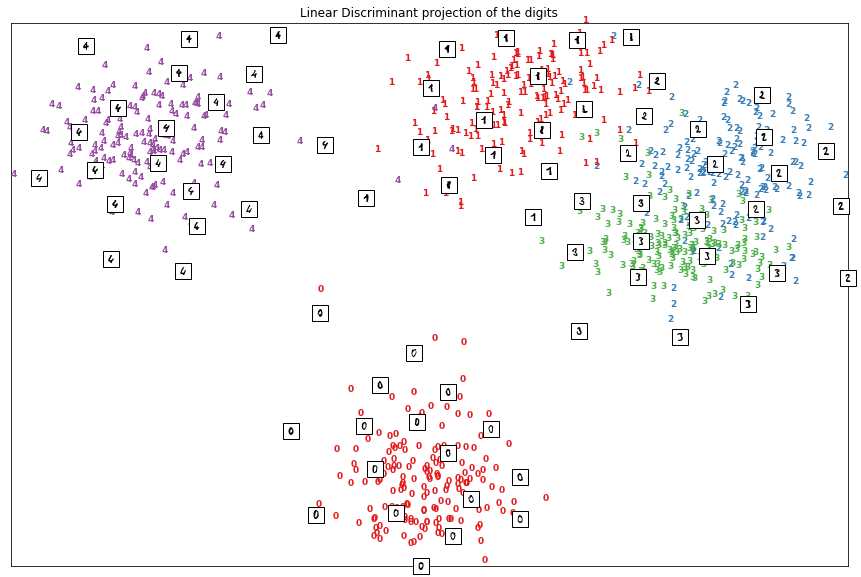

In [167]:
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits")

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


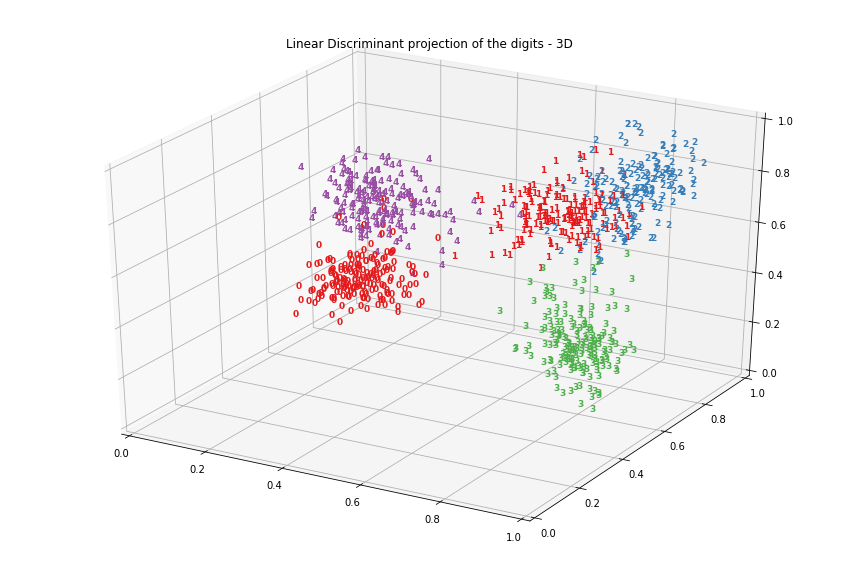

In [168]:
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=3).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits - 3D")

### Isomap Projection

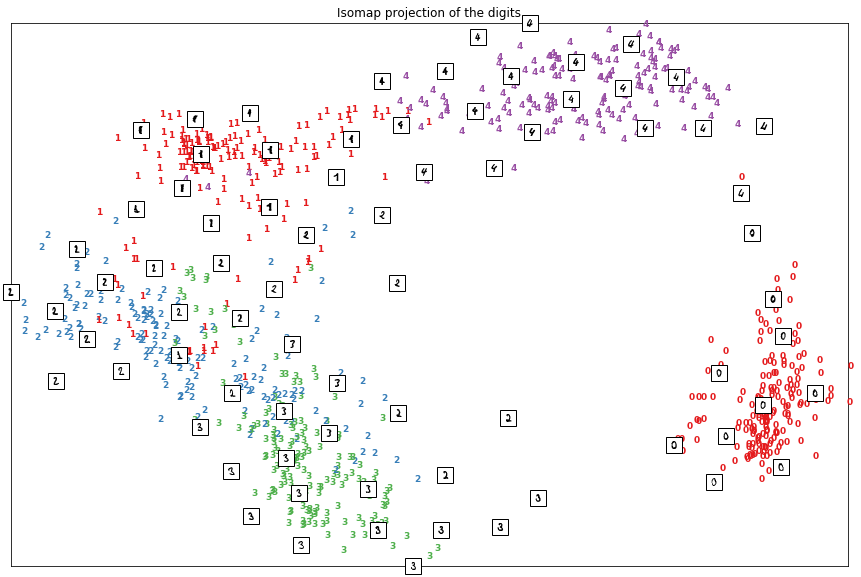

In [169]:
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
plot_embedding(X_iso,
               "Isomap projection of the digits")

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


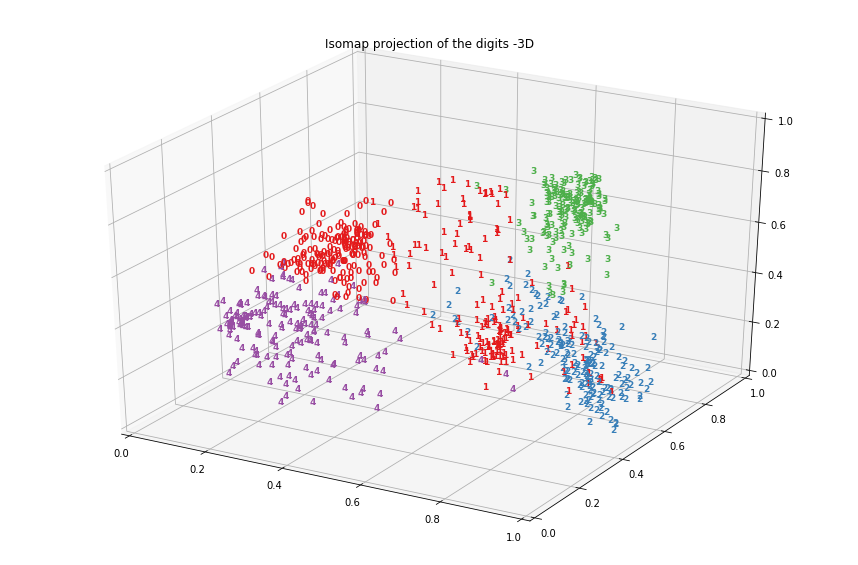

In [170]:
X_iso = manifold.Isomap(n_neighbors, n_components=3).fit_transform(X)
plot_embedding(X_iso,
               "Isomap projection of the digits -3D")

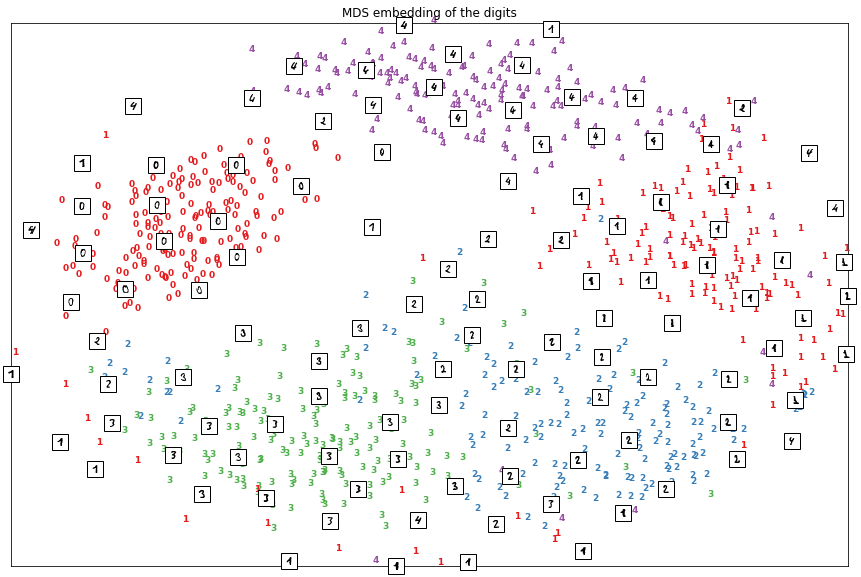

In [96]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
plot_embedding(X_mds,
               "MDS embedding of the digits")

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


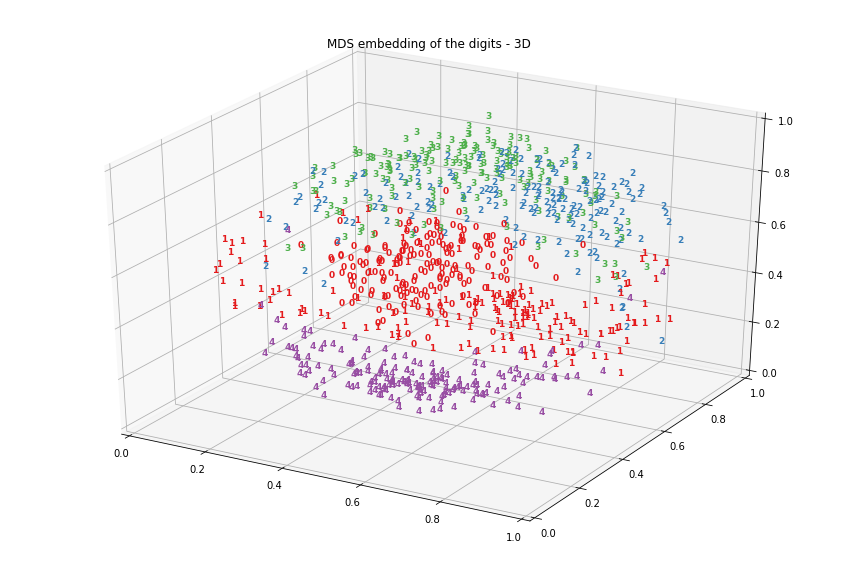

In [172]:
clf = manifold.MDS(n_components=3, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
plot_embedding(X_mds,
               "MDS embedding of the digits - 3D")

### LLE

Reconstruction error: 0.282761


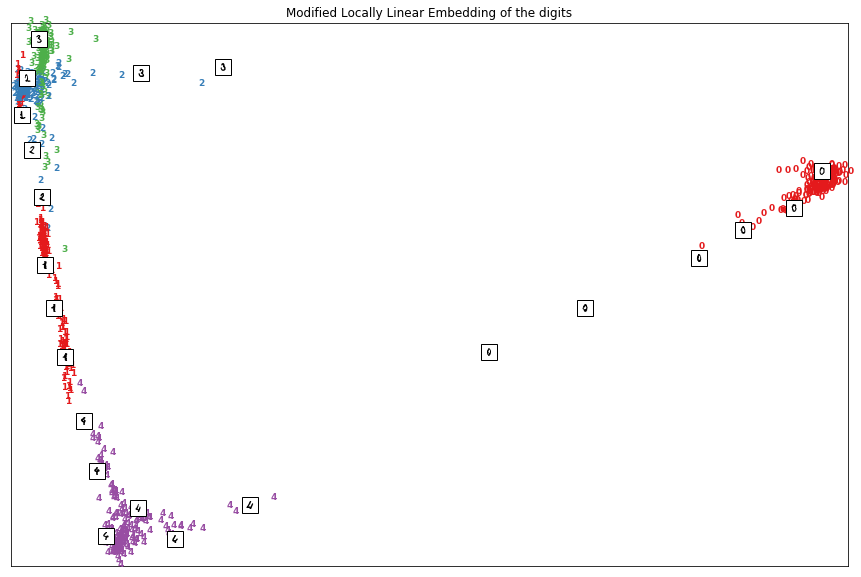

In [100]:
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
X_mlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits")


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


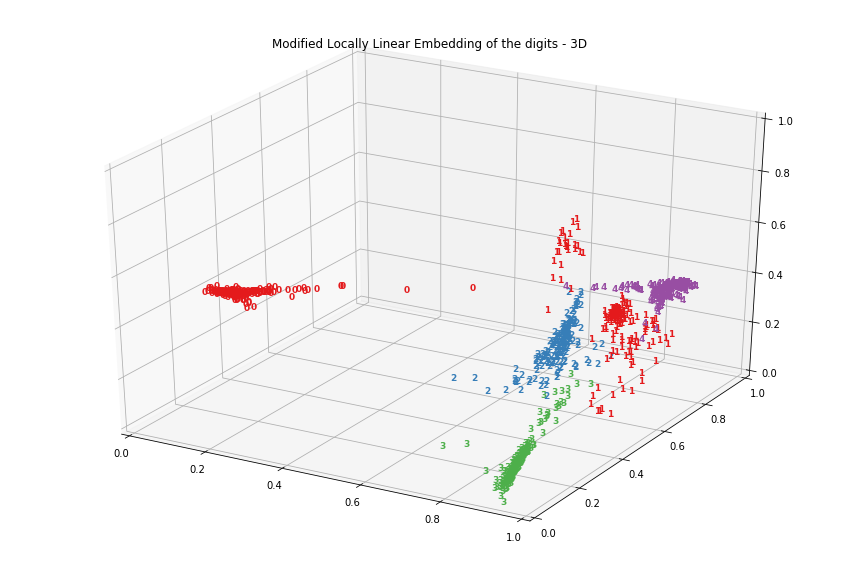

In [173]:
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=3,
                                      method='modified')
X_mlle = clf.fit_transform(X)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits - 3D")


Reconstruction error: 0.158389


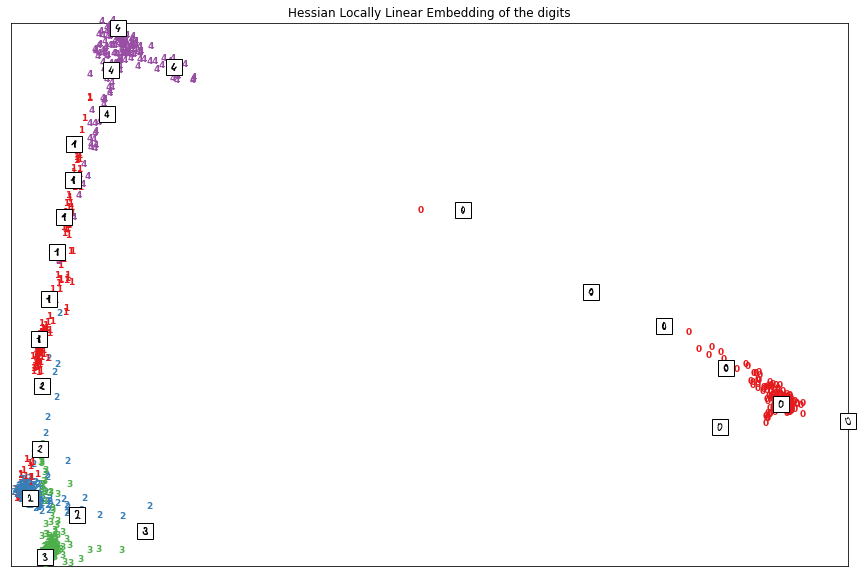

In [108]:
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
X_hlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits")

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


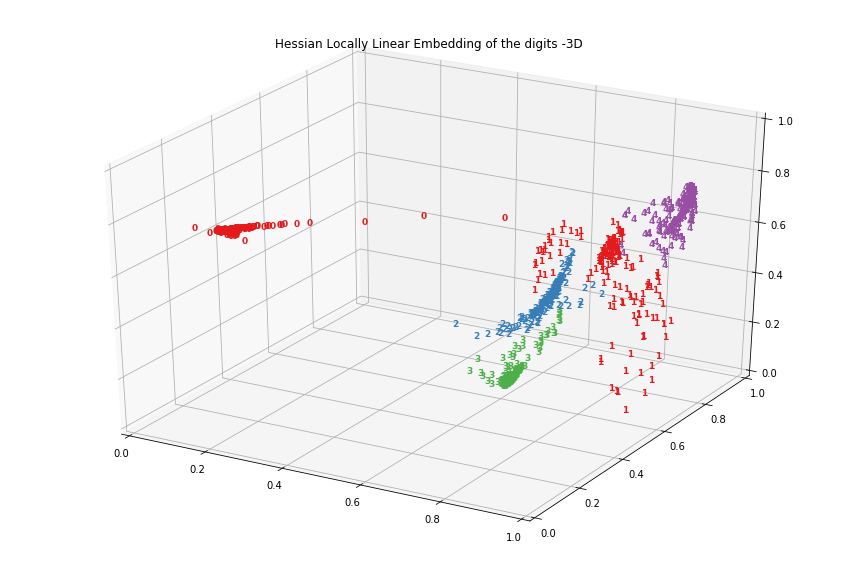

In [174]:
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=3,
                                      method='hessian')
X_hlle = clf.fit_transform(X)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits -3D")

Reconstruction error: 0.158396


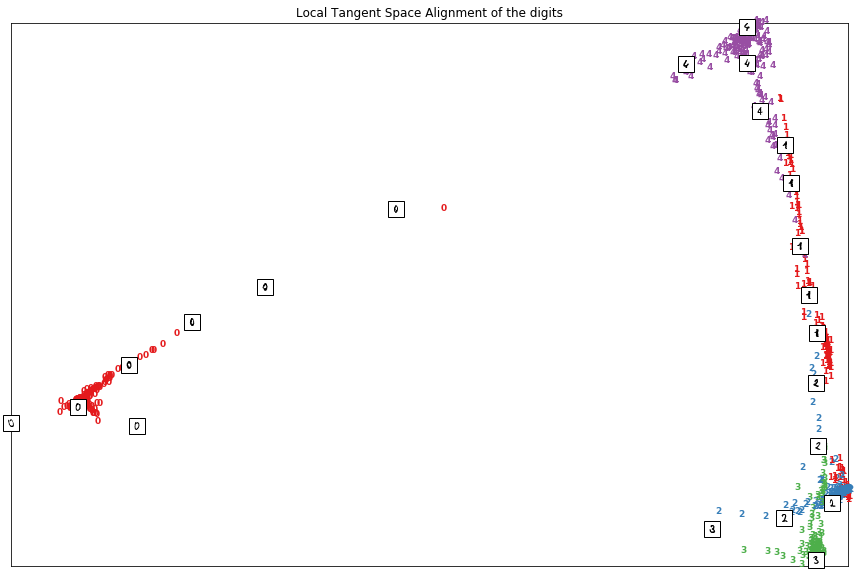

In [175]:
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
X_ltsa = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits")

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


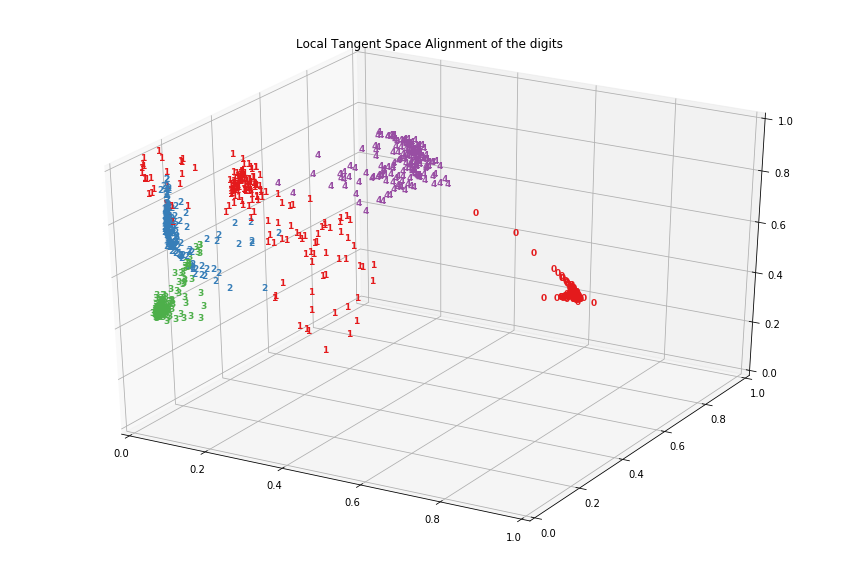

In [176]:
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=3,
                                      method='ltsa')
X_ltsa = clf.fit_transform(X)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits")

## Spectral embedding

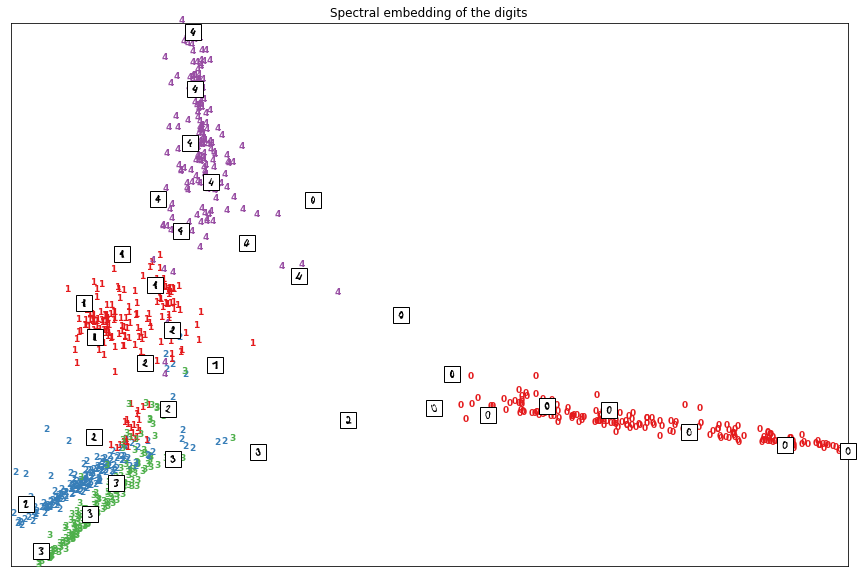

In [177]:
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
X_se = embedder.fit_transform(X)
plot_embedding(X_se,
               "Spectral embedding of the digits")

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


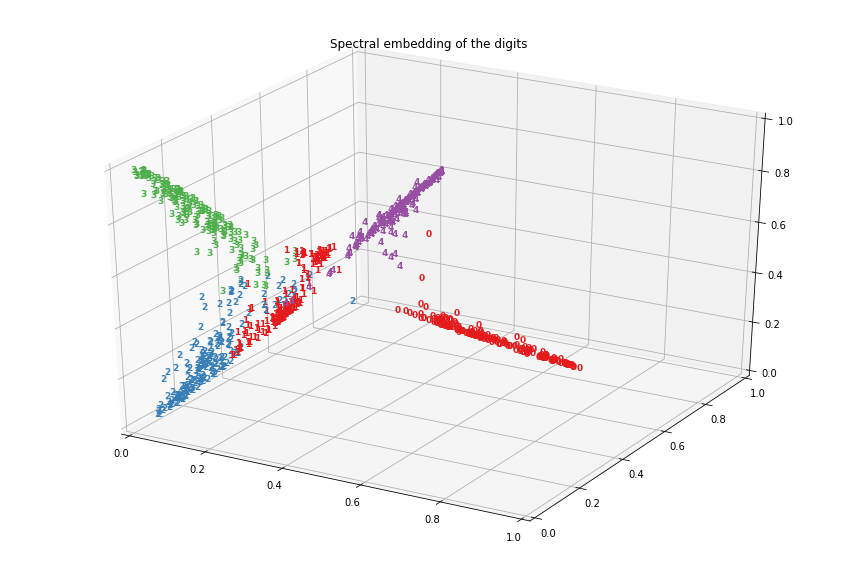

In [178]:
embedder = manifold.SpectralEmbedding(n_components=3, random_state=0,
                                      eigen_solver="arpack")
X_se = embedder.fit_transform(X)
plot_embedding(X_se,
               "Spectral embedding of the digits")

## T-SNE

## How does TSNE works?

[Video Here](https://www.youtube.com/watch?v=aStvaXMhGGs)

### first a brief introduction to T-distribution

__sample variance__:

$$s^2=\frac{1}{N-1}\sum_{i=1}^{N}(x_i-\bar{x})^2$$

$$t=\frac{\bar{x}-\mu}{s/\sqrt{N}}$$

__degree of freedom__: $$n-1$$

![](../images/t_dis.png)

__Notes__:

- df=1 => __Cauchy distribution__
- with larger df, the distribution get closer to normal distribution
- t-distribution tends to be __heavily tailed__

### KNN graph (k-Nearest Neighbour Graph)

![](../images/knn.png)

- Goal
    - estimate geodesic by constructing a KNN graph on manifold 
        - local distance calculation (small field) => Euclidean geometry
        - global distance calculation (large field, such as navigation, aviation) => riemannian geometry
> Hoe to construct a KNN graph
    
- space-partitioning trees
- locality sensitive hashing
- neighbor exploring techniques
    - K-D tree (recursive process, until the number of points inside a node < threshold, denote as leaf, end)
![](../images/kd.png)

> How to find the kth neareast neighbors in k-d tree?

![](../images/kd2.png)

> What problems would it have?


![](../images/kd3.png)

![](../images/kd4.png)

- All splits are axis aligned
- __Curse of Dimensionality__ makes KD-Trees ineffective for higher number of dimensions


> Solutions?


### Random Projection Tree

In random projection, the original d-dimensional data is projected to a k-dimensional (k << d) subspace, using a random$$ {\displaystyle k\times d}$$ dimensional matrix R whose rows have unit lengths

![](../images/ran1.png)

#### (attention!) The depth of the random projection tree does not depend on the dimension of dataset, instead it depends on the manifold dimension the dataset is in.

[for more precise information](http://www.math.ubc.ca/~feldman/m428/manifolds.pdf)


> how to get k-NN using random projection tree?

![](../images/ran2.png)

- create several random projection trees
- find subset of the point requested in all these trees in parallel


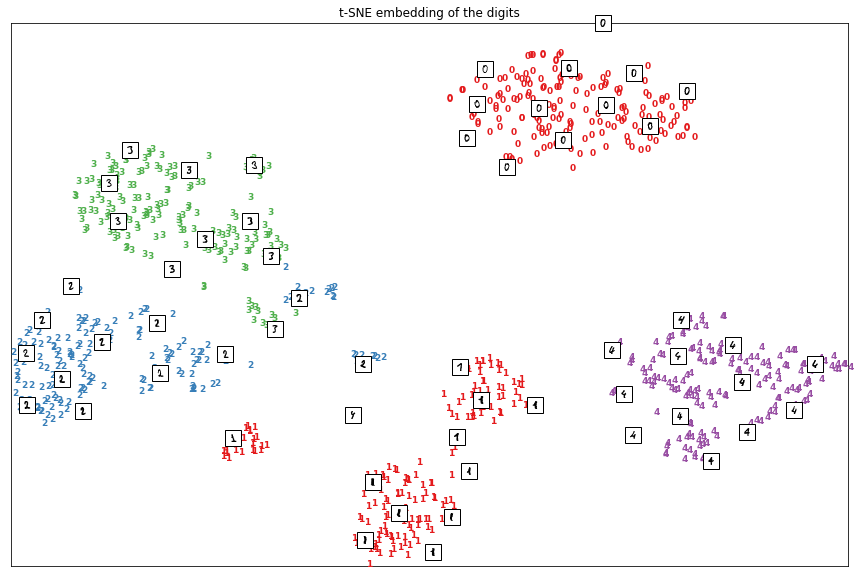

In [182]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


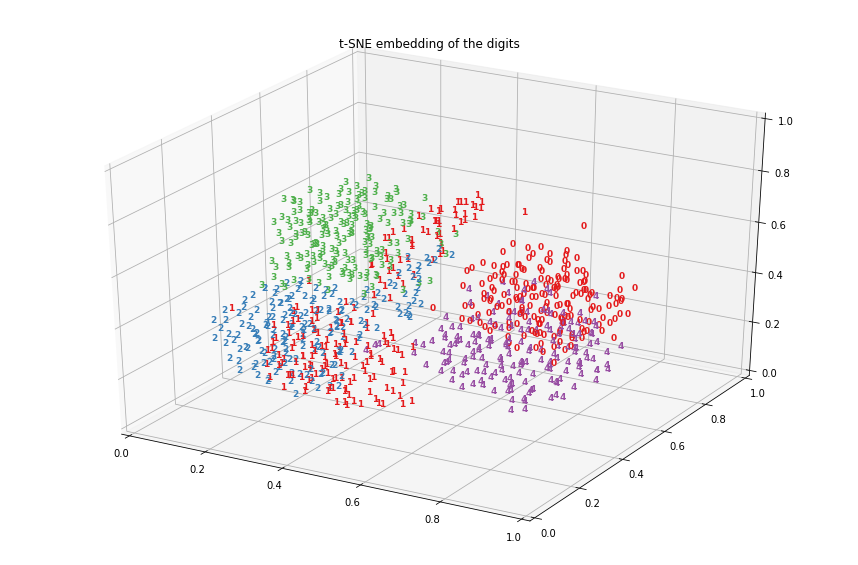

In [181]:
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

## Conclusion: 

so far, T-SNE appears to have the best performance

### Other embedding technique

see other posts here:

- [LLE](#)
- [Word2Vec](#)